# Introduction

<p>Twitter has become an important communication channel in times of emergency.
The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies).

<h3> Objective </h3>
<p>To build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t. </p>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
path = '/Users/Asus/Desktop/Unity Game/python/Data_Analysis/Text_Classification/dataset'

train = pd.read_csv(os.path.join(path, 'train.csv'))
test = pd.read_csv(os.path.join(path, 'test.csv'))

### First glance of data

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
train.describe(include='all')

,id,keyword,location,text,target
count,7613.000000,7552,5080,7613,7613.00000
unique,NaN,221,3341,7503,NaN
top,NaN,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...,NaN
freq,NaN,45,104,10,NaN
mean,5441.934848,NaN,NaN,NaN,0.42966
std,3137.116090,NaN,NaN,NaN,0.49506
min,1.000000,NaN,NaN,NaN,0.00000
25%,2734.000000,NaN,NaN,NaN,0.00000
50%,5408.000000,NaN,NaN,NaN,0.00000
75%,8146.000000,NaN,NaN,NaN,1.00000


### Data shape

In [5]:
print(f'Shape of train data: {train.shape},\nShape of test data: {test.shape}')

Shape of train data: (7613, 5),
Shape of test data: (3263, 4)


### Missing data

In [6]:
print('Missing value count:')
train.isnull().sum()

Missing value count:


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

training dataset target (Disaster status) pie chart


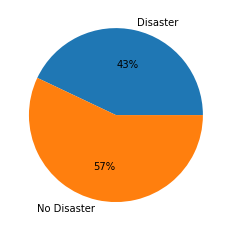

In [7]:
target_class = {'Disaster' :(train.target == 1).sum(), 'No Disaster': (train.target == 0).sum()}
print('training dataset target (Disaster status) pie chart')
plt.pie(data = target_class, labels=target_class.keys(), x=target_class.values(), autopct='%.0f%%')
plt.show()

### Text data preprocessing

In [8]:
train.text

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

#### - Identify URL in the test and remove it

In [9]:
print('Text with URL (first 5 text):')
[txt for txt in train.text if 'http:' in txt or 'www.' in txt][:5]

Text with URL (first 5 text):


['@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C',
 'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
 '#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi',
 'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N',
 'INEC Office in Abia Set Ablaze - http://t.co/3ImaomknnA']

In [10]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

# for train dataset
train['text_cleaned'] = train.text.apply(lambda x: remove_url(x))
# for test dataset
test['text_cleaned'] = test.text.apply(lambda x: remove_url(x))

print('All the URL link has been removed')
[txt for txt in train.text_cleaned if 'http:' in txt or 'www.' in txt][:]

All the URL link has been removed


[]

#### - Remove all punctuation

In [11]:
# train dataset
train['text_cleaned'] = train.text_cleaned.apply(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
# test dataset
test['text_cleaned'] = test.text_cleaned.apply(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
train['text_cleaned']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    ariaahrary TheTawniest The out of control wild...
7610                M194 0104 UTC5km S of Volcano Hawaii 
7611    Police investigating after an ebike collided w...
7612    The Latest More Homes Razed by Northern Califo...
Name: text_cleaned, Length: 7613, dtype: object